In [4]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import dfm_tools as dfmt
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# era5_data = xr.load_dataset(
#     "/scratch-shared/mverlaan/gtsm_openDA_david/stochModel/input_dflowfm/climate_forcing/ERA5_CDS_atm_msl_2014-05-25_2014-06-30.nc"
# )
# mdt_data = xr.load_dataset(
#     "/scratch-shared/mverlaan/gtsm_openDA_david/stochModel/input_dflowfm/climate_forcing/pressure_mdt.nc"
# )
# noise_data = xr.load_dataset(
#     "/scratch-shared/mverlaan/gtsm_openDA_david/stochModel/input_dflowfm/airpressure_noise.nc"
# )
map_data = dfmt.open_partitioned_dataset(
    "/scratch-shared/mverlaan/gtsm_openDA_david/stochModel/input_dflowfm/output_pressurecheck/gtsm_fine_0*_map.nc"
)

>> xu.open_dataset() with 20 partition(s): 1 [mapformat1] [nodomainvar] 2 [mapformat1] [nodomainvar] 3 [mapformat1] [nodomainvar] 4 [mapformat1] [nodomainvar] 5 [mapformat1] [nodomainvar] 6 [mapformat1] [nodomainvar] 7 [mapformat1] [nodomainvar] 8 [mapformat1] [nodomainvar] 9 [mapformat1] [nodomainvar] 10 [mapformat1] [nodomainvar] 11 [mapformat1] [nodomainvar] 12 [mapformat1] [nodomainvar] 13 [mapformat1] [nodomainvar] 14 [mapformat1] [nodomainvar] 15 [mapformat1] [nodomainvar] 16 [mapformat1] [nodomainvar] 17 [mapformat1] [nodomainvar] 18 [mapformat1] [nodomainvar] 19 [mapformat1] [nodomainvar] 20 [mapformat1] [nodomainvar] : 5.27 sec
>> xu.merge_partitions() with 20 partition(s): 14.78 sec
>> some variables dropped with merging of partitions: ['mesh2d_enc_x', 'mesh2d_enc_y', 'mesh2d_enc_part_node_count', 'mesh2d_enc_interior_ring', 'BndLink', 'FlowLink', 'FlowLinkType', 'FlowLink_xu', 'FlowLink_yu', 'FlowLinkDomain', 'windxu', 'windyu']
>> dfmt.open_partitioned_dataset() total: 20.1

In [6]:
nc = dfmt.remove_periodic_cells(map_data)

>> removing 1760 periodic cells from dataset: 29.18 sec


<xarray.Dataset>
Dimensions:                     (nmesh2d_EnclosureInstance: 1, time: 7,
                                 nNetNode: 1737471, nNetElem: 1942715,
                                 nNetElemMaxNode: 4, nFlowElemContourPts: 4,
                                 nNetLink: 3680878, nNetLinkContourPts: 4,
                                 nNetLinkPts: 2)
Coordinates:
  * time                        (time) datetime64[ns] 2014-05-25 ... 2014-05-...
    NetNode_x                   (nNetNode) float64 dask.array<chunksize=(89673,), meta=np.ndarray>
    NetNode_y                   (nNetNode) float64 dask.array<chunksize=(89673,), meta=np.ndarray>
  * nNetNode                    (nNetNode) int64 0 1 2 ... 1737469 1737470
    FlowElem_xcc                (nNetElem) float64 dask.array<chunksize=(99851,), meta=np.ndarray>
    FlowElem_ycc                (nNetElem) float64 dask.array<chunksize=(99851,), meta=np.ndarray>
  * nNetElem                    (nNetElem) int64 0 1 2 ... 1942713 1942714
  * nNetLink                    (nNetLink) int64 0 1 2 ... 3680876 3680877
Dimensions without coordinates: nmesh2d_EnclosureInstance, nNetElemMaxNode,
                                nFlowElemContourPts, nNetLinkContourPts,
                                nNetLinkPts
Data variables: (12/30)
    mesh2d_enc_node_count       (nmesh2d_EnclosureInstance) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mesh2d_enclosure_container  float32 ...
    wgs84                       int32 ...
    timestep                    (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    NetNode_z                   (nNetNode) float64 dask.array<chunksize=(89673,), meta=np.ndarray>
    NetElemLink                 (nNetElem, nNetElemMaxNode) int32 dask.array<chunksize=(99851, 4), meta=np.ndarray>
    ...                          ...
    NetLinkType                 (nNetLink) int32 dask.array<chunksize=(189553,), meta=np.ndarray>
    NetLinkContour_x            (nNetLink, nNetLinkContourPts) float64 dask.array<chunksize=(189553, 4), meta=np.ndarray>
    NetLinkContour_y            (nNetLink, nNetLinkContourPts) float64 dask.array<chunksize=(189553, 4), meta=np.ndarray>
    NetLink_xu                  (nNetLink) float64 dask.array<chunksize=(189553,), meta=np.ndarray>
    NetLink_yu                  (nNetLink) float64 dask.array<chunksize=(189553,), meta=np.ndarray>
    ElemLink                    (nNetLink, nNetLinkPts) int32 dask.array<chunksize=(189553, 2), meta=np.ndarray>
Attributes:
    institution:    Deltares
    references:     http://www.deltares.nl
    source:         Deltares, D-Flow FM Version 1.2.177.142431, Jan 26 2023, ...
    history:        Created on 2023-09-14T12:20:09+0200, D-Flow FM
    date_created:   2023-09-14T12:20:09+0200
    date_modified:  2023-09-14T12:20:09+0200
    Conventions:    UGRID-0.9
    uuid:           098b7d18-6d57-4135-8079-320bd22ba2f0

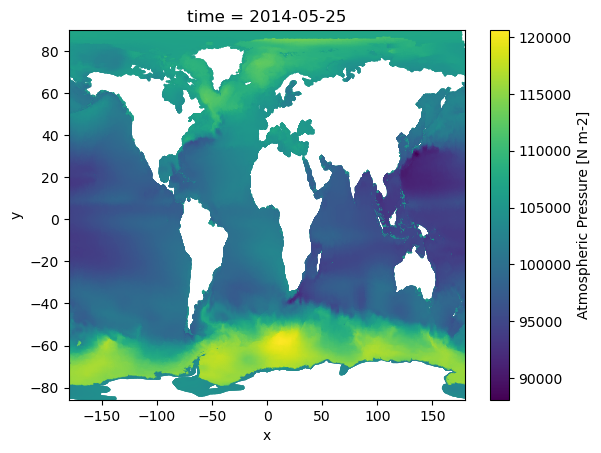

In [7]:
nc.isel(time=0).Patm.ugrid.plot()

In [3]:
# Everything mapped to mdt grid

mdt_pressure = mdt_data.isel(time=0).drop_vars("time").p
noise_pressure = noise_data.isel(time=0).drop_vars("time").p
rasterized_era5 = (
    era5_data.rename({"longitude": "x", "latitude": "y"})
    .drop_dims("time")
    .interp_like(mdt_data.isel(time=0).drop_vars("time"))
)
rasterized_map = dfmt.rasterize_ugrid(
    map_data.Patm.isel(time=0), ds_like=mdt_pressure
).drop_vars(["time", "FlowElem_xcc", "FlowElem_ycc", "nNetElem"])

>> rasterizing ugrid DataArray to shape=(1440,1440): 

59.04 sec


In [ ]:
mdt_pressure - noise_pressure.p

NameError: name 'mdt_pressure' is not defined